In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [5]:
# Load dataset
data = pd.read_csv('Shill Bidding Dataset.csv')

In [7]:
data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [9]:
data.tail()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [13]:
data.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [15]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64



Generating pairplot


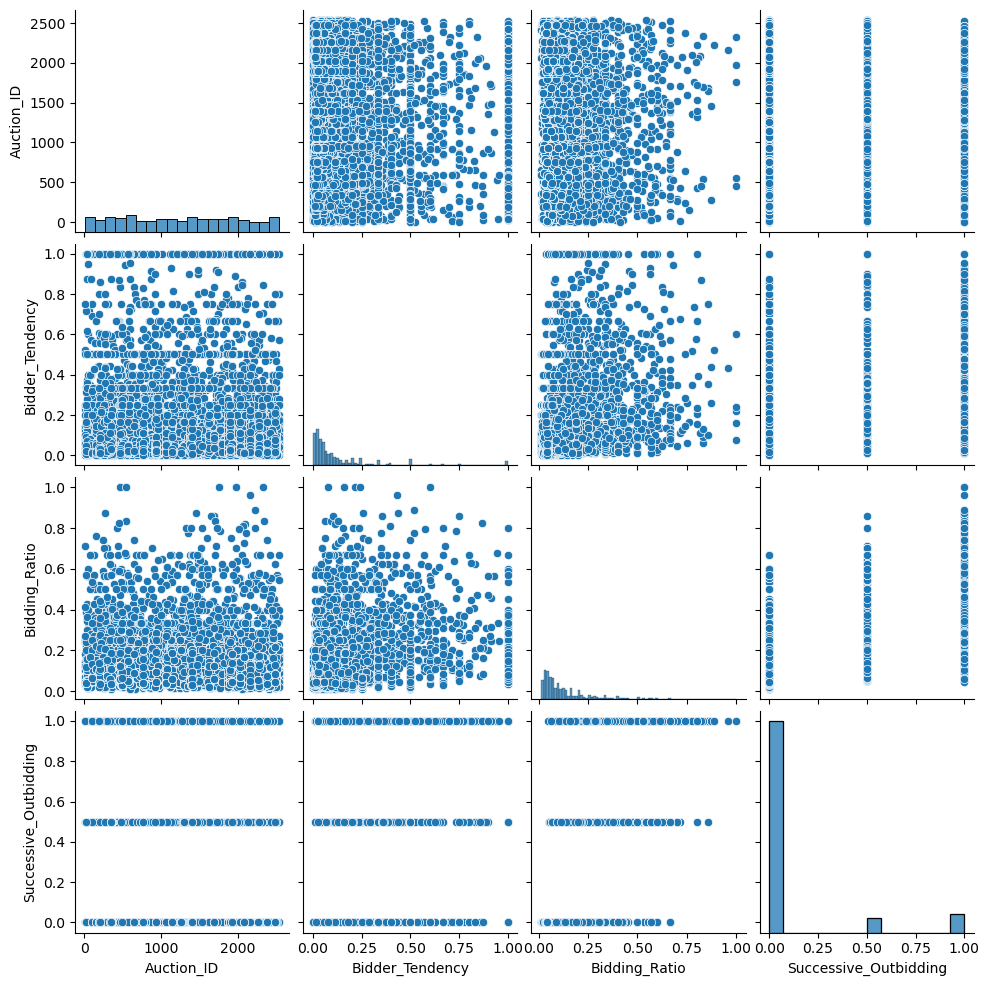

In [21]:
# Pairplot for visualizing relationships
print("\nGenerating pairplot")
sns.pairplot(data.iloc[:, 1:6])  # Example columns for visualization
plt.show()

In [23]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
print("Non-Numeric Columns:", non_numeric_columns)

# Check unique values in each non-numeric column
for col in non_numeric_columns:
    print(f"Unique values in '{col}':\n", data[col].unique())


Non-Numeric Columns: ['Bidder_ID']
Unique values in 'Bidder_ID':
 ['_***i' 'g***r' 't***p' ... '3***o' 'd***6' '9***7']


In [25]:
data = data.drop(columns=['Bidder_ID'])


Generating correlation heatmap


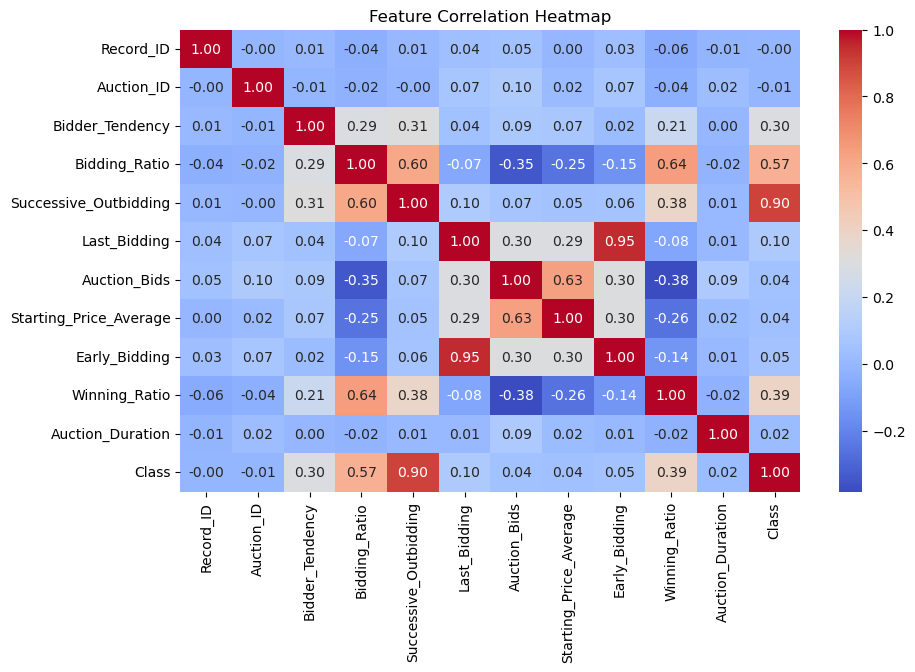

In [29]:
# Correlation heatmap
print("\nGenerating correlation heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
# Value counts for categorical data
if 'Class' in data.columns:
    print("\nClass Distribution:")
    print(data['Class'].value_counts())


Class Distribution:
Class
0    5646
1     675
Name: count, dtype: int64


In [35]:
# Drop non-numeric and irrelevant columns
columns_to_drop = ['Record_ID', 'Auction_ID', 'Class']  # Modify based on dataset
data_clustering = data.drop(columns=columns_to_drop)

In [39]:
# Standardise numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clustering)


Plotting Elbow Method


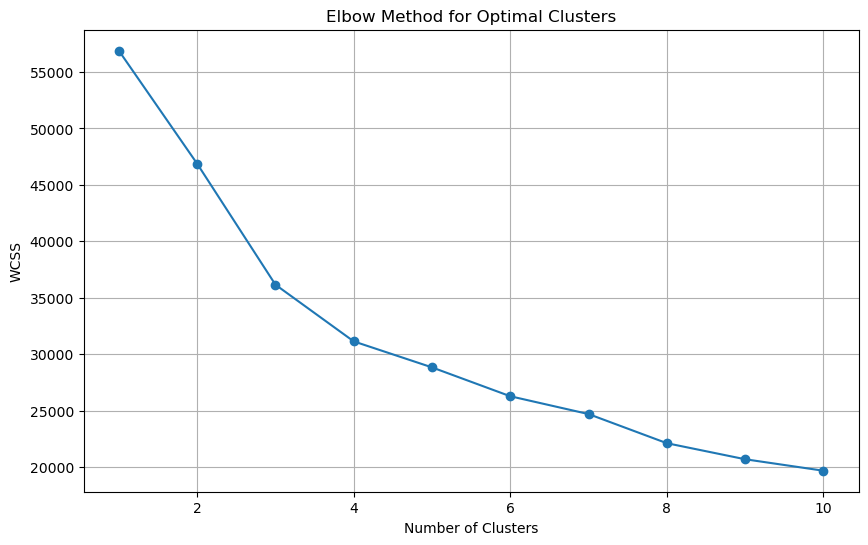

In [43]:
# Determine optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
print("\nPlotting Elbow Method")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

In [45]:
# Apply K-Means with optimal clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = kmeans_labels

In [49]:
# Calculate silhouette scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"\nSilhouette Score for K-Means: {kmeans_silhouette}")


Silhouette Score for K-Means: 0.24977240569535908


In [53]:
# Distribution of Class within K-Means Clusters
kmeans_class_distribution = data.groupby('KMeans_Cluster')['Class'].value_counts(normalize=True)
print("\nK-Means Cluster Class Distribution:\n", kmeans_class_distribution)


K-Means Cluster Class Distribution:
 KMeans_Cluster  Class
0               1        0.792328
                0        0.207672
1               0        0.986829
                1        0.013171
2               0        0.985726
                1        0.014274
Name: proportion, dtype: float64


In [55]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


Visualizing K-Means Clusters...


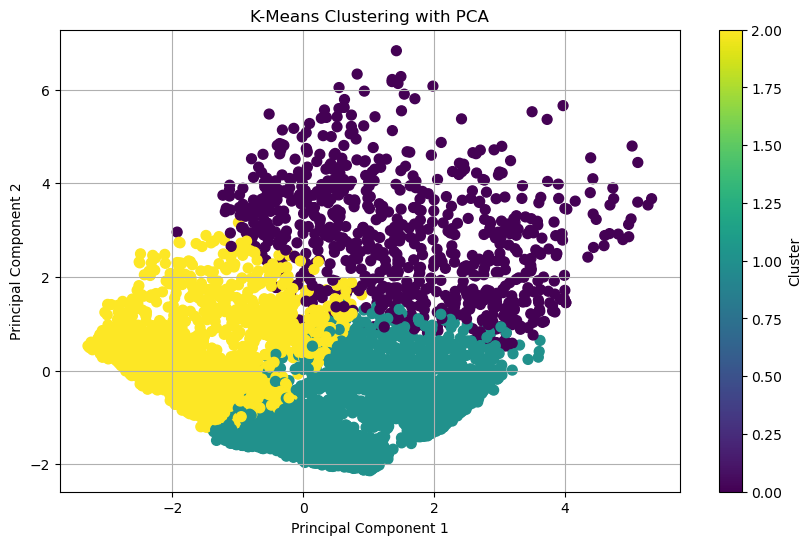

In [57]:
# K-Means Clustering Visualization
print("\nVisualizing K-Means Clusters...")
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Plotting dendrogram...


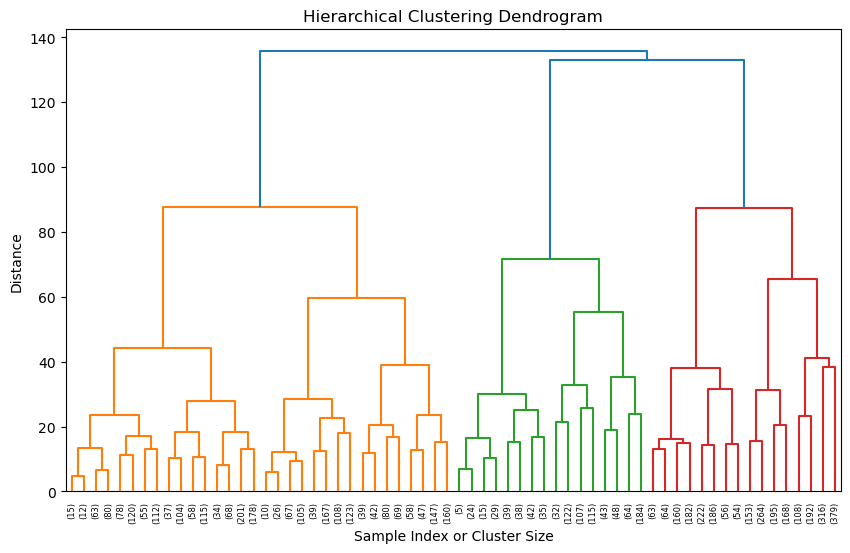

In [59]:
# Generate linkage matrix for dendrogram
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
print("\nPlotting dendrogram...")
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [61]:
# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)
data['Hierarchical_Cluster'] = hierarchical_labels

In [63]:
# Calculate silhouette scores
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}")

Silhouette Score for Hierarchical Clustering: 0.20596641017620096


In [65]:
# Distribution of Class within Hierarchical Clusters
hierarchical_class_distribution = data.groupby('Hierarchical_Cluster')['Class'].value_counts(normalize=True)
print("\nHierarchical Cluster Class Distribution:\n", hierarchical_class_distribution)



Hierarchical Cluster Class Distribution:
 Hierarchical_Cluster  Class
0                     0        0.982805
                      1        0.017195
1                     0        0.993845
                      1        0.006155
2                     1        0.650743
                      0        0.349257
Name: proportion, dtype: float64



Visualizing Hierarchical Clusters


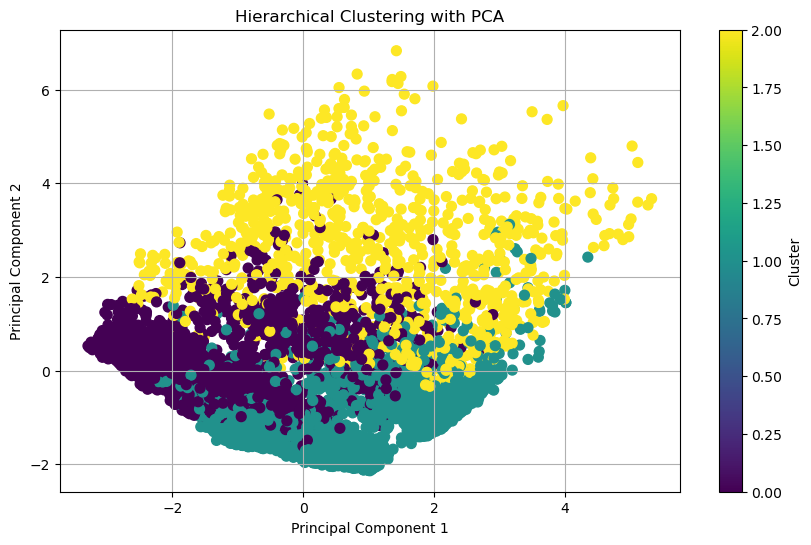

In [71]:
# Hierarchical Clustering Visualization
print("\nVisualizing Hierarchical Clusters")
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()